In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The continuous glucose monitoring data is available in the file `external_data.csv`, generated by the script `download_data.py`.
This file contains the glucose measurements on 24h or 48h of the patients.

We can also look at the cgm data for one patient, giving his/her id in a function.

In [3]:
def get_cgm_data(path='../'):
    data = pd.read_csv(path + 'external_data.csv')
    data.set_index('patient_id', inplace=True)
    return data

def get_patient_cgm_data(patient_id, path='../'):
    cgm_data = get_cgm_data(path)
    patient_cgm = cgm_data.loc[patient_id]
    patient_cgm.dropna(inplace=True)
    return patient_cgm

cgm_data = get_patient_cgm_data(1)

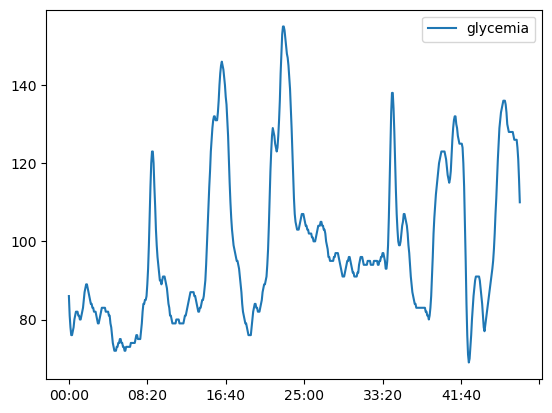

In [4]:
def plot_cgm_data(cgm_data):
    fig, axs = plt.subplots()
    cgm_data.plot(label="glycemia")
    axs.legend()
    
plot_cgm_data(cgm_data)

In [5]:
cgm_all_data = get_cgm_data()
cgm_all_data.head()

,00:00,00:05,00:10,00:15,00:20,00:25,00:30,00:35,00:40,00:45,...,47:10,47:15,47:20,47:25,47:30,47:35,47:40,47:45,47:50,47:55
patient_id,,,,,,,,,,,,,,,,,,,,,
1,86.0,81.0,78.0,76.0,76.0,77.0,78.0,80.0,81.0,82.0,...,128.0,127.0,126.0,126.0,126.0,126.0,124.0,121.0,116.0,110.0
2,167.0,163.0,158.0,151.0,144.0,137.0,132.0,127.0,125.0,125.0,...,129.0,129.0,129.0,129.0,129.0,130.0,130.0,131.0,132.0,133.0
3,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,89.0,88.0,...,89.0,90.0,90.0,92.0,93.0,94.0,95.0,96.0,96.0,97.0
4,93.0,92.0,92.0,91.0,92.0,93.0,95.0,98.0,101.0,103.0,...,124.0,122.0,120.0,119.0,119.0,118.0,117.0,115.0,113.0,111.0
5,107.0,109.0,111.0,114.0,116.0,116.0,116.0,115.0,113.0,110.0,...,120.0,121.0,124.0,128.0,131.0,134.0,136.0,137.0,136.0,134.0


We need to be careful with missing values in this dataset, as they reflect if the CGM data is available for 24h or 48h for each patient.

In [6]:
# patient with only 24 hours of CGM data
patients_24h = cgm_all_data[cgm_all_data.isna().sum(axis=1)!=0].index
patients_24h

Int64Index([41, 72, 75, 82, 87, 89, 97, 111, 121, 123, 148, 150, 159, 186, 197,
            201, 202],
           dtype='int64', name='patient_id')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

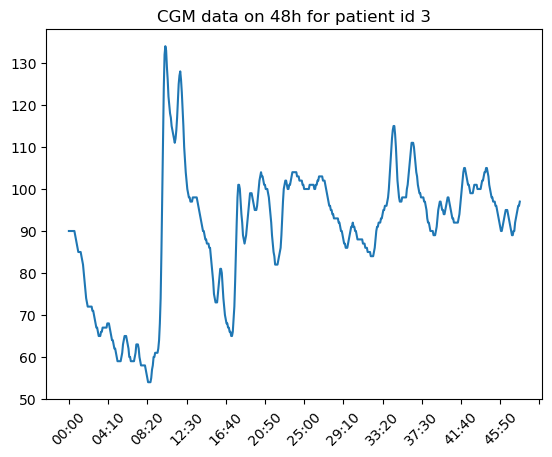

In [7]:
fig, ax = plt.subplots(1, 1) 
plt.title("CGM data on 48h for patient id 3")
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.plot(cgm_all_data.loc[3])
plt.xticks(rotation=45)

We consider only 24h for patients for the statistics, and merge the data with labels diabetic or not.

In [8]:
from download_data import read_clinical_data_and_labels

In [9]:
cgm_patients = cgm_all_data.iloc[:,:288]
_, lbl = read_clinical_data_and_labels(path='../')

In [10]:
cgm_patients

,00:00,00:05,00:10,00:15,00:20,00:25,00:30,00:35,00:40,00:45,...,23:10,23:15,23:20,23:25,23:30,23:35,23:40,23:45,23:50,23:55
patient_id,,,,,,,,,,,,,,,,,,,,,
1,86.0,81.0,78.0,76.0,76.0,77.0,78.0,80.0,81.0,82.0,...,148.0,147.0,145.0,142.0,139.0,134.0,129.0,123.0,117.0,111.0
2,167.0,163.0,158.0,151.0,144.0,137.0,132.0,127.0,125.0,125.0,...,108.0,106.0,103.0,100.0,97.0,95.0,94.0,95.0,97.0,99.0
3,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,89.0,88.0,...,101.0,100.0,100.0,101.0,101.0,102.0,103.0,104.0,104.0,104.0
4,93.0,92.0,92.0,91.0,92.0,93.0,95.0,98.0,101.0,103.0,...,108.0,109.0,110.0,110.0,111.0,111.0,112.0,113.0,114.0,115.0
5,107.0,109.0,111.0,114.0,116.0,116.0,116.0,115.0,113.0,110.0,...,107.0,103.0,99.0,97.0,95.0,95.0,98.0,102.0,108.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,140.0,140.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,142.0,...,137.0,136.0,136.0,134.0,133.0,132.0,132.0,131.0,132.0,132.0
205,159.0,160.0,161.0,161.0,161.0,159.0,155.0,150.0,144.0,136.0,...,139.0,147.0,157.0,166.0,176.0,185.0,194.0,201.0,207.0,211.0
206,113.0,111.0,110.0,110.0,110.0,110.0,111.0,111.0,111.0,112.0,...,96.0,98.0,99.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0


**Extract some features on CGM time series data for each patient**

In [11]:
df_stat = pd.DataFrame({}, index=cgm_patients.index)
df_stat['lbl'] = lbl

In [12]:
# create a dataframe with different features (classicial descriptive statistics functions)
df_stat['cgm_mean'] = list(cgm_patients.mean(axis=1))
df_stat['cgm_std'] = list(cgm_patients.std(axis=1))
df_stat['cgm_max'] = list(cgm_patients.max(axis=1))
df_stat['cgm_min'] = list(cgm_patients.min(axis=1))

<AxesSubplot:xlabel='lbl', ylabel='cgm_max'>

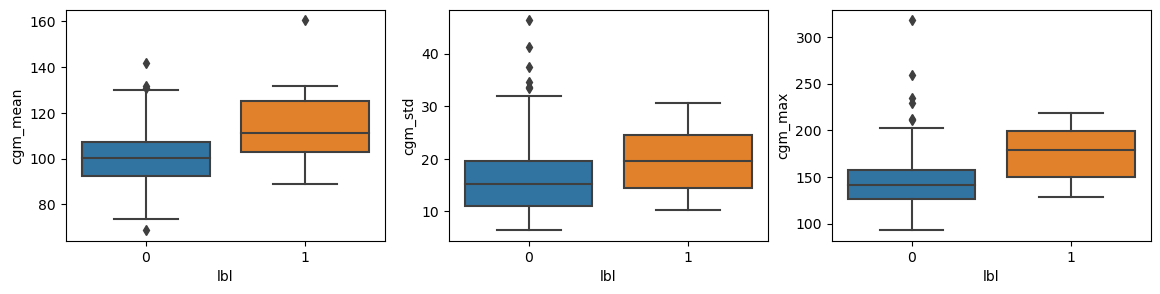

In [13]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.boxplot(data=df_stat, x='lbl', y="cgm_mean")
plt.subplot(1,3,2)
sns.boxplot(data=df_stat, x='lbl', y="cgm_std")
plt.subplot(1,3,3)
sns.boxplot(data=df_stat, x='lbl', y="cgm_max")

We can see that descriptive statistics of the CGM time series could be use for differenciation between diabetic and non diabetic patients. Diabetic patients tend to have a higher mean of glucose value during the day, and reach probably a higher maximum than non diabetic values.

We can implement a large variety of metrics to analyse this CGM data. It could be interesting to understand the time spent by patients in hyperglycemia or hypoglycemia situation, as a percentage of a day for example. The following functions allow to consider the proportion of the day spent by the patient in the normal interval glycaemia, above this interval (hyperglycameia), and below (hypoglycaemia).

In [14]:
# normal range of glucose values : 70-110
def compute_average_time_in_range(cgm_val, normal_range=[70, 110]):
    col_in_range = cgm_val[(cgm_val >= normal_range[0]) & (cgm_val <= normal_range[1])]
    return len(col_in_range)/len(cgm_val)

def compute_average_time_below(cgm_val, value=70):
    col_below = cgm_val[(cgm_val < value)]
    return len(col_below)/len(cgm_val)

def compute_average_time_above(cgm_val, value=110):
    col_above = cgm_val[(cgm_val > value)]
    return len(col_above)/len(cgm_val)

In [15]:
df_stat["cgm_normal_range"] = cgm_patients.apply(compute_average_time_in_range, axis=1)
df_stat["cgm_under_range"] = cgm_patients.apply(compute_average_time_below, axis=1)
df_stat["cgm_above_range"] = cgm_patients.apply(compute_average_time_above, axis=1)

<AxesSubplot:xlabel='lbl', ylabel='cgm_above_range'>

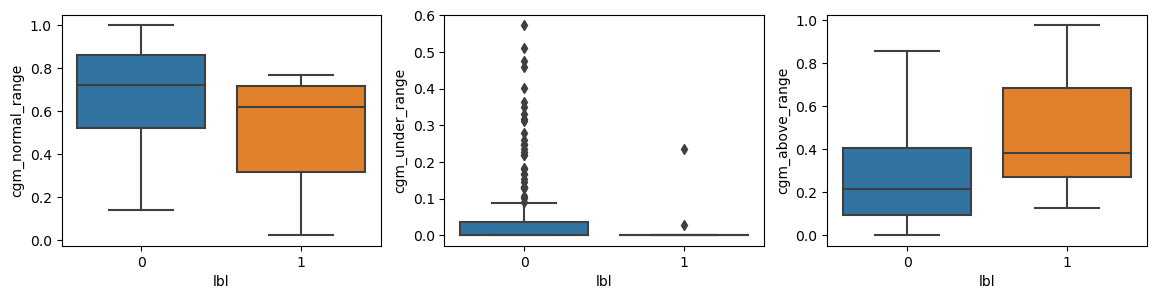

In [16]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.boxplot(data=df_stat, x='lbl', y="cgm_normal_range")
plt.subplot(1,3,2)
sns.boxplot(data=df_stat, x='lbl', y="cgm_under_range")
plt.subplot(1,3,3)
sns.boxplot(data=df_stat, x='lbl', y="cgm_above_range")

The sum of these three numbers is equal to 1 for each patient. We can note by looking at these graphs that diabetic patients spend very few time in hypoglycaemia situation, and more generally people tend to be more in hyperglycaemia than hypoglycaemia. Glucose values of diabetic patients may be less often in normal range than others.

We can also compute other features on CGM time series, such as the area under the CGM curve on 24h, the skewness, or different percentiles (here 3rd quartile).

In [30]:
from numpy import trapz
df_stat["area_under_cgm"] = cgm_patients.apply(trapz, axis=1)
df_stat["skewness"] = list(cgm_patients.skew(axis=1))
df_stat["Q3"] = list(cgm_patients.quantile(0.75, axis=1))

<AxesSubplot:xlabel='lbl', ylabel='Q3'>

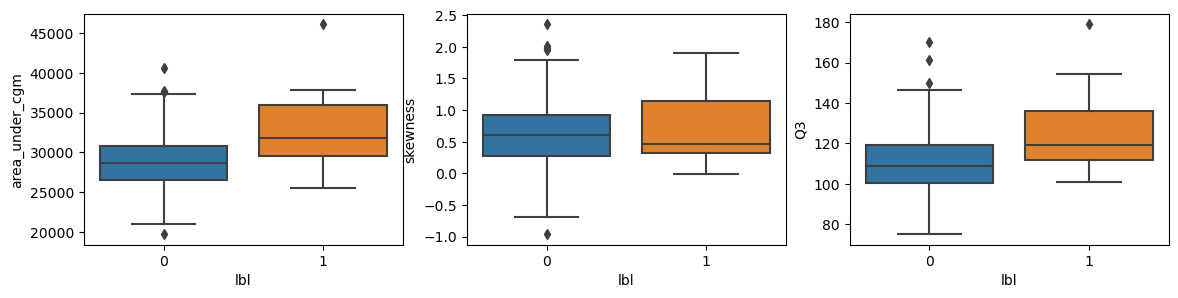

In [31]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.boxplot(data=df_stat, x='lbl', y="area_under_cgm")
plt.subplot(1,3,2)
sns.boxplot(data=df_stat, x='lbl', y="skewness")
plt.subplot(1,3,3)
sns.boxplot(data=df_stat, x='lbl', y="Q3")

We can also try to consider the glucose level at different times of the day (NB : the first value corresponds to the one measured at midnight for the first day).
We can for example consider windows of 8 hours (to divide 24 hours in 3).

In [35]:
#TODO

These new features regarding the patients are part of the data exploration we can do on the CGM time series, to finally determine whether the patient is going to be Type 2 diabetic or not in addition to the clinical data.

Other suggestions could be implemented: looking at postprandial overall values (that would use more of the time serie structure), night mean value, day mean value, day variance, etc...